# 1) Setup
We will be using different libraries and modules which have to be (pip) installed or imported. You can find a list of both below, sorted by their first appearance in the code.
## 1.1) pip install commands

In [1]:
# Section 5.1)
!pip install Keras-Preprocessing # '!' runs pip as a shell rather than a notebook command

ERROR: Invalid requirement: '#'


## 1.2) Libraries

In [2]:
# Section 2.1) Set Folder Path
import os

# Section 2.2) Import air quality data for New York, Milan and Tokyo from data folder
import pandas as pd

# Section 2.3) Import New York health data from Github repository and do a quality check
import requests
import io

# Section 3.3) Process final dataframe
import numpy as np

# Section 4.1) Scatterplots
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings

# Section 4.2) Plotting by date
import math
import plotly.express as px
import plotly.graph_objects as go

# Section 5.2) Create functions for training and testing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers, utils, backend
import keras

## 1.3) Shell commands

To use the *write_image()* function in section 4.2 with the 'kaleido' engine, please run the following command in the Windows Command Prompt: 
<br> pip install -U kaleido

## 1.4) Set seed
For better reproducibility, we are setting a global seed. We use *tf.keras.utils.set_random_seed()* instead of *tf.random.set_seed()* as the former affects all standard Python packages.

In [3]:
seed = 777
tf.keras.utils.set_random_seed(seed) 

# 2) Import Data
## 2.1) Set Folder Path

In [4]:
PATH = '..\data'
print(os.getcwd())

C:\Users\maxim\OneDrive\Desktop\Unibo\Machine Learning Systems for Data Science_90477\Module II\Final Project\pr7-main\scripts


## 2.2) Import air quality data for New York, Milan and Tokyo from data folder

Here we import the air quality data for the three cities from our folder path. We rename the pollutants by removing a space so they work seamlessly in our code. We then get an overview of our data: In the *describe()* function we set *datetime_is_numeric = True*, so datetime data is treated as numeric rather than categorical, which also silences a Python warning.

### 2.2.1) For New York

In [5]:
ny_air_PATH = os.path.join(PATH, 'new-york-air-quality.csv')
ny_air = pd.read_csv(ny_air_PATH, parse_dates = ['date'])
ny_air.rename(columns = {' pm25': 'pm25_ny', ' o3': 'o3_ny', ' no2': 'no2_ny', ' co': 'co_ny'}, inplace = True)

# Overview
ny_air.info()
ny_air.describe(datetime_is_numeric = True)
print(ny_air.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3207 non-null   datetime64[ns]
 1   pm25_ny  3207 non-null   object        
 2   o3_ny    3207 non-null   object        
 3   no2_ny   3207 non-null   object        
 4   co_ny    3207 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 125.4+ KB
        date pm25_ny o3_ny no2_ny co_ny
0 2022-11-01      40    28     20     3
1 2022-11-02      45    23     25     3
2 2022-11-03      53    17     26     4
3 2022-11-04      47    24     10     1
4 2022-11-05      31    21      6     1


### 2.2.2) For Milan

In [6]:
ml_air_PATH = os.path.join(PATH, 'milano-senato__lombardia__italy-air-quality.csv')
ml_air = pd.read_csv(ml_air_PATH, parse_dates = ['date'])
ml_air.rename(columns = {' pm25': 'pm25_ml', ' pm10': 'pm10_ml', ' no2': 'no2_ml',\
                         ' co': 'co_ml'}, inplace = True)

# Overview
ml_air.info()
ml_air.describe(datetime_is_numeric = True)
print(ml_air.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2860 non-null   datetime64[ns]
 1   pm25_ml  2860 non-null   object        
 2   pm10_ml  2860 non-null   object        
 3   no2_ml   2860 non-null   object        
 4   co_ml    2860 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 111.8+ KB
        date pm25_ml pm10_ml no2_ml co_ml
0 2022-12-01     134      34     27      
1 2022-12-02      82      24     23      
2 2022-12-03      76      13     20      
3 2022-12-04      53      16     22      
4 2022-12-05      50      36     39      


### 2.2.3) For Tokyo

In [7]:
tk_air_PATH = os.path.join(PATH, 'hibiyakoen_-chiyoda__tokyo__japan-air-quality.csv')
tk_air = pd.read_csv(tk_air_PATH, parse_dates = ['date'])
tk_air.rename(columns = {' pm25': 'pm25_tk', ' pm10': 'pm10_tk', ' o3': 'o3_tk',\
                         ' no2': 'no2_tk', ' so2': 'so2_tk', ' co': 'co_tk'}, inplace = True)

# Overview
tk_air.info()
tk_air.describe(datetime_is_numeric = True)
print(tk_air.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3271 non-null   datetime64[ns]
 1   pm25_tk  3271 non-null   object        
 2   pm10_tk  3271 non-null   object        
 3   o3_tk    3271 non-null   object        
 4   no2_tk   3271 non-null   object        
 5   so2_tk   3271 non-null   object        
 6   co_tk    3271 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 179.0+ KB
        date pm25_tk pm10_tk o3_tk no2_tk so2_tk co_tk
0 2022-12-01      25       9    19     15      1     2
1 2022-12-02      29      11           18            4
2 2022-12-03      36      14    15     16      1     4
3 2022-12-04      46       9    17     16      1     2
4 2022-12-05      29       7    14     17            3


## 2.3) Import New York health data from Github repository and do a quality check

### 2.3.1) Import New York health data from Github repository

Here we import the health data for New York from a Github repository, using the request package and the 'raw' version of the URL. The code *requests.get().content* outputs a byte object, which can be decoded using *io.StringIO*. The resulting *io.StringIO* object is accepted as input for the *pd.read_csv()* function.

In [8]:
url_ny_health = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv'
download_ny_health = requests.get(url_ny_health).content # class: 'bytes'
ny_health = pd.read_csv(io.StringIO(download_ny_health.decode('utf-8')), sep = ',', parse_dates = ['date_of_interest'])
ny_health.rename(columns = {'DEATH_COUNT': 'death_ny'}, inplace = True)

# Overview
ny_health.info()
ny_health.describe(datetime_is_numeric = True)
print(ny_health.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 67 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date_of_interest                 1073 non-null   datetime64[ns]
 1   CASE_COUNT                       1073 non-null   int64         
 2   PROBABLE_CASE_COUNT              1073 non-null   int64         
 3   HOSPITALIZED_COUNT               1073 non-null   int64         
 4   death_ny                         1073 non-null   int64         
 5   PROBABLE_DEATH_COUNT             1073 non-null   int64         
 6   CASE_COUNT_7DAY_AVG              1073 non-null   int64         
 7   ALL_CASE_COUNT_7DAY_AVG          1073 non-null   int64         
 8   HOSP_COUNT_7DAY_AVG              1073 non-null   int64         
 9   DEATH_COUNT_7DAY_AVG             1073 non-null   int64         
 10  ALL_DEATH_COUNT_7DAY_AVG         1073 non-null   int64      

### 2.3.2) Compare the confirmed death count of all districts with the aggregate variable (quality check)

As we can see, the data includes separate *CASE_COUNT* variables for the districts of New York city. In the following cell, we check if the total death count is really the sum of the district death counts. We see that this is not the case on two dates. However, these two dates do not fall into our focus period, and can therefore be ignored.

In [9]:
ny_health_death_sum = pd.DataFrame({'death_ny_sum': ny_health.loc[:, ['BX_DEATH_COUNT', 'BK_DEATH_COUNT', 'MN_DEATH_COUNT',\
                                                                   'QN_DEATH_COUNT', 'SI_DEATH_COUNT']].sum(axis = 1)})
ny_health_death_total = ny_health[['date_of_interest', 'death_ny']]
ny_health_death_merged = pd.concat([ny_health_death_total, ny_health_death_sum], axis = 1)

"""We use the merged dataframe to: 
1) get a simple boolean response if there is a mismatch
2) show the exact rows where the mismatch appears"""

print(ny_health_death_merged['death_ny'].equals(ny_health_death_merged['death_ny_sum']))

"""We do not have a perfect match. However, the mismatch is negligible as it does not fall into the period (2020-03-03 - 
2020-06-26) we are focusing on:"""
ny_health_death_merged.loc[ny_health_death_merged['death_ny'] != ny_health_death_merged['death_ny_sum']]

False


,date_of_interest,death_ny,death_ny_sum
415,2021-04-19,42,41
653,2021-12-13,21,20


The quality check showed that *death_ny* can be used for our study. We now throw out all the other variables and keep only *date_of_interest* and *death_ny*.

In [10]:
ny_health = ny_health.loc[:, ['date_of_interest', 'death_ny']]

## 2.4) Import Milan health data from Github repository and derive a proxy for the death count

### 2.4.1) Import Milan health data from Github repository (takes around 40sec to run)

The Milan health data is also imported from a Github repository, using the request package and the 'raw' version of the URL. However, we have a separate CSV file for every day, and each CSV file shows data for all the provinces of Italy. The approach is to loop through every day in our focus period, create an URL by concatenation, and then extract the value under for the *Milano* row under the *totale_casi* column. This is achieved by string splitting the content of our *request.get()* output.

In [11]:
# Create a date range for concatenation (below) and initialize the case_count list and the ml_health dictionary
# Note: We start on 2nd March 2020 in order to derive the growth (= new cases) for 3rd March 2020.
date_range_strings = pd.date_range(start = '20200302', end = '20200626', freq = 'D').strftime('%Y%m%d')
case_count_list = []
ml_health = {'date': [], 'cum_case_ml': []}

# Loop through list of URLs and create a dictionary with key = 'date' and value = 'case'
for i in date_range_strings:
    
    # Create URL by string concatenation
    url_ml_health = ('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-'\
                     + i + '.csv') 
    download_ml_health = requests.get(url_ml_health).content # class: 'bytes'
    
    # Use string splits to single out the row for 'Milano' and the column 'totale_casi'
    cum_case_count = str(download_ml_health).split('Milano')[1].split(',\\n')[0].split(',')[4] 
    
    # Append the dictionary with the new key-value pair
    ml_health['date'].append(i)
    ml_health['cum_case_ml'].append(cum_case_count)
    
print(ml_health)

{'date': ['20200302', '20200303', '20200304', '20200305', '20200306', '20200307', '20200308', '20200309', '20200310', '20200311', '20200312', '20200313', '20200314', '20200315', '20200316', '20200317', '20200318', '20200319', '20200320', '20200321', '20200322', '20200323', '20200324', '20200325', '20200326', '20200327', '20200328', '20200329', '20200330', '20200331', '20200401', '20200402', '20200403', '20200404', '20200405', '20200406', '20200407', '20200408', '20200409', '20200410', '20200411', '20200412', '20200413', '20200414', '20200415', '20200416', '20200417', '20200418', '20200419', '20200420', '20200421', '20200422', '20200423', '20200424', '20200425', '20200426', '20200427', '20200428', '20200429', '20200430', '20200501', '20200502', '20200503', '20200504', '20200505', '20200506', '20200507', '20200508', '20200509', '20200510', '20200511', '20200512', '20200513', '20200514', '20200515', '20200516', '20200517', '20200518', '20200519', '20200520', '20200521', '20200522', '20200

### 2.4.2) Create a proxy for the death count by multiplying the daily cases with the case fatality rate (CFR)

Looking at the metadata (Source: https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md), the above 
output for 'totale_casi' only gives us the 'Total amount of positive cases', which is a cumulative sum. We therefore have to take the first difference to obtain the new cases per day. Afterwards, we multiply the number of cases by the case fatality rate (CFR) to obtain a proxy for the death count. The CFR for Milan during February-May 2020 has been calculated as 17.3%. (Source: https://epiprev.it/documenti/downloadfile.php?fileid=29bf488c8dae81773eee15a8497d89b5cdec4f84)

In [12]:
# 2.4.2.1) Convert the ml_health dictionary into a dataframe
ml_health = pd.DataFrame.from_dict(ml_health)

# 2.4.2.2) Take the first difference to obtain the new cases per day
ml_health['case_ml'] = ml_health['cum_case_ml'].astype(pd.Int64Dtype()).diff(periods = 1)

# 2.4.2.3) Multiply the number of cases by a CFR of 17.3%
cfr_ml = 0.173
ml_health['death_ml'] = (ml_health['case_ml'] * cfr_ml).round().astype(pd.Int64Dtype())
ml_health.head()

,date,cum_case_ml,case_ml,death_ml
0,20200302,58,<NA>,<NA>
1,20200303,93,35,6
2,20200304,145,52,9
3,20200305,197,52,9
4,20200306,267,70,12


## 2.5) Import Tokyo health data from Github repository

For Tokyo, we are using again the 'raw' version of the data, which is provided by the Tokyo Metropolitan Government on Github. The data is stored in the JSON format as a dictionary with two keys, the second of which provides a list of dictionaries in its values: We use *read_json()* from pandas and change the parameters of the function to obtain a list of dictionaries, which can be converted to a dataframe using the *DataFrame()* function from pandas.

In [13]:
url_tk_health = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/deaths.json'

# The output of the following pd.json_read() command is a list of dictionaries:
tk_health = pd.read_json(url_tk_health, orient = 'index', typ = 'series')['data'] 

# Turn the list of dictionaries into a dataframe 
tk_health = pd.DataFrame(tk_health)
tk_health.rename(columns = {'count': 'death_tk'}, inplace = True)
tk_health['death_date'] = pd.to_datetime(tk_health['death_date'],  format = '%Y-%m-%d')

# Overview
tk_health.info()
tk_health.describe(datetime_is_numeric = True)
print(tk_health.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   death_date  1079 non-null   datetime64[ns]
 1   death_tk    1079 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.0 KB
  death_date  death_tk
0 2020-02-26         1
1 2020-02-27         0
2 2020-02-28         0
3 2020-02-29         0
4 2020-03-01         0


# 3) Process and merge data
## 3.1) Process data

In the next steps, we define and apply two functions which prepare all our dataframes, before merging them to our final dataframe.

### 3.1.1) Convert the date column and sort the data by dates

The function *convert_sort_date_rows()*, creates an index from the date column, converts the date column to a *datetime64[ns]* data type and sorts the data. We also obtain a print of the date range covered by our data.

In [14]:
def convert_sort_date_rows(data, date_column_name: str):
    
    # Use date_column_name to create a column index number
    date_column_index = data.columns.get_loc(date_column_name)
    
    # Convert date column to date-format without loosing the Dtype 'datetime64[ns]'
    data.iloc[:, date_column_index] = pd.to_datetime(data.iloc[:, date_column_index])
    
    # Sort by date_column_name and print the date range
    data = data.sort_values(by = date_column_name)
    date_range_min = min(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    date_range_max = max(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    print(f'Date range: {date_range_min}, {date_range_max}')
    
    return(data)

### 3.1.2) Apply the *convert_sort_date_rows()* function to air data

In [15]:
print("New York air quality data:")
ny_air = convert_sort_date_rows(data = ny_air, date_column_name = 'date')
print("Tokyo air quality data:")
tk_air = convert_sort_date_rows(data = tk_air, date_column_name = 'date')
print("Milan air quality data:")
ml_air = convert_sort_date_rows(data = ml_air, date_column_name = 'date')

New York air quality data:
Date range: 2014-01-01, 2022-11-20
Tokyo air quality data:
Date range: 2014-01-02, 2022-12-31
Milan air quality data:
Date range: 2014-10-05, 2022-12-28


### 3.1.3) Apply the *convert_sort_date_rows()* function to health data

In [16]:
print("New York health data:")
ny_health = convert_sort_date_rows(data = ny_health, date_column_name = 'date_of_interest')
print("Tokyo health data:")
tk_health = convert_sort_date_rows(data = tk_health, date_column_name = 'death_date')
print("Milan health data:")
ml_health = convert_sort_date_rows(data = ml_health, date_column_name = 'date')
# We can see that the Tokyo date range includes the other. We therefore need an outer merge in 3.2)

New York health data:
Date range: 2020-02-29, 2023-02-05
Tokyo health data:
Date range: 2020-02-26, 2023-02-08
Milan health data:
Date range: 2020-03-02, 2020-06-26


### 3.1.4) Find missing date rows in both air and health and add the missing rows


The function *add_missing_date_rows()* finds missing rows (= dates) in our data and adds them back, which means that some rows are created which show missing values on the other columns. We also get an output of the missing rows before and after the fix.

<br> 1) After using the date column to create a column index number as well as the date range minimum & maximum, we use the date column as the new index. Setting the date column as the index of the DataFrame allows us to use the Pandas time-series functionality, such as handling missing dates, reindexing the DataFrame, etc.
<br>
<br> 2) Once we turned our imperfect date range into a datetime object (*data.index*), we use it as input in the *difference()* function: The function is applied to a perfect date range between our minimum and maximum dates, and outputs those dates which cannot be found in *data.index*. We print the number of missing rows as well as the actual date rows.
<br>
<br> 3) We create a perfect date range between our minimum and maximum dates, and use that date range in *reindex()* as our replacement for the current (imperfect) date range. Afterwards we present the same print statements as before, to compare if our correction worked.
<br>
<br> 4) We reset the index, which means that an integer number is again used as the index. The column *index* is now just a pandas series and we rename it to the original name of the date column, just so that this cell can be re-run repeatedly.

In [17]:
def add_missing_date_rows(data, date_column_name):
    
    # Before dropping the date_column_name (see below): Use it to create a column index number and the date range min/max
    date_column_index = data.columns.get_loc(date_column_name)
    date_range_min = min(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    date_range_max = max(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    data = data.set_index(date_column_name, drop = True) # Set date as index; the original date_column_name is dropped here
    
    # Find missing date rows
    data.index = pd.to_datetime(data.index) # format to date time object
    date_missing_before = pd.date_range(start = str(date_range_min), end = str(date_range_max)).difference(data.index)
    print(str(date_missing_before.size) + " date rows are missing (before fix)")
    print(date_missing_before) 
    
    # Add the missing date rows
    date_range = pd.date_range(str(date_range_min), str(date_range_max)) # creates perfect date range
    data = data.reindex(date_range)
    date_missing_after = pd.date_range(start = str(date_range_min), end = str(date_range_max)).difference(data.index)
    print(str(date_missing_after.size) + " date rows are missing (after fix)")
    print(date_missing_after)
    
    data.reset_index(inplace = True, drop = False) # needed to undo the index setting above; inplace = True means the 
    # original air dataframe is targeted; drop = False retrieves the original date column.
    data.rename(columns={'index': date_column_name}, inplace = True) # returning to original column name, so this cell can be re-run easier
    
    return(data)

### 3.1.5) Apply the *add_missing_date_rows()* function to air data

In [18]:
print("New York air quality data:")
ny_air = add_missing_date_rows(data = ny_air, date_column_name = 'date')

New York air quality data:
39 date rows are missing (before fix)
DatetimeIndex(['2014-12-29', '2014-12-30', '2014-12-31', '2016-01-01',
               '2017-01-28', '2017-09-06', '2017-09-07', '2017-09-08',
               '2018-12-31', '2019-10-07', '2019-10-08', '2019-10-09',
               '2019-10-10', '2019-10-11', '2019-10-12', '2019-10-13',
               '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17',
               '2019-10-18', '2019-10-19', '2019-10-20', '2019-10-21',
               '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-26', '2019-10-27', '2019-10-28', '2019-10-29',
               '2019-10-30', '2019-10-31', '2019-11-01', '2019-11-02',
               '2019-12-30', '2019-12-31', '2020-03-30'],
              dtype='datetime64[ns]', freq=None)
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [19]:
print("Tokyo air quality data:")
tk_air = add_missing_date_rows(data = tk_air, date_column_name = 'date')

Tokyo air quality data:
15 date rows are missing (before fix)
DatetimeIndex(['2014-01-24', '2014-01-25', '2014-12-28', '2014-12-29',
               '2014-12-30', '2015-01-10', '2017-09-07', '2017-09-08',
               '2017-09-09', '2019-12-30', '2020-03-30', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-09-11'],
              dtype='datetime64[ns]', freq=None)
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [20]:
print("Milan air quality data:")
ml_air = add_missing_date_rows(data = ml_air, date_column_name = 'date')

Milan air quality data:
147 date rows are missing (before fix)
DatetimeIndex(['2014-12-29', '2014-12-30', '2015-12-30', '2017-03-10',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10',
               ...
               '2021-01-02', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-05-03', '2021-05-04', '2021-10-14', '2022-07-19',
               '2022-07-20', '2022-07-31'],
              dtype='datetime64[ns]', length=147, freq=None)
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


### 3.1.6) Apply the *add_missing_date_rows()* function to health data

In [21]:
print("New York health data:")
ny_health = add_missing_date_rows(data = ny_health, date_column_name = 'date_of_interest')

New York health data:
0 date rows are missing (before fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [22]:
print("Tokyo health data:")
tk_health = add_missing_date_rows(data = tk_health, date_column_name = 'death_date')

Tokyo health data:
0 date rows are missing (before fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [23]:
print("Milan health data:")
ml_health = add_missing_date_rows(data = ml_health, date_column_name = 'date')

Milan health data:
0 date rows are missing (before fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


## 3.2) Merge data from air and health into the final dataframe; process the data

### 3.2.1) Outer merge all air data sets by their date columns


We first merge all the air quality tables together, using outer joins and the key *date*.

In [24]:
air = pd.merge(pd.merge(ny_air, tk_air, how = 'outer', on = 'date'), ml_air, how = 'outer', on = 'date')

### 3.2.2) Outer merge all health data sets by their date columns

For the health data we do the same, but we have to specify different keys depending on the table. Note: The Tokyo date range includes those from New York and Milan - see 3.1.3)

In [25]:
health = pd.merge(pd.merge(tk_health, ny_health, how = 'outer', left_on = 'death_date', right_on = 'date_of_interest'),\
                  ml_health, how = 'outer', left_on = 'death_date', right_on = 'date')

### 3.2.3) - 3.2.6)

In the following, we merge air and health by their date columns (*date* and *death_date*). By creating *df_merged*, we get the columns *date_x* and *date_y*, as *date* is already available in both the air and the health table.
<br>
We then use the *combine_first()* function to create a single date column which combines the entries from both *date* (renamed to *date_x*) and *death_date*. Finally, we define the exact date range and 'cut' our dataframe accordingly - creating *df_final*. We replace empty string values by *NaN*.

In [26]:
# 3.2.3) Outer merge air and health by their date columns; change all variables of interest to Dtype 'int64'
df_merged = pd.merge(air, health, how = 'outer', left_on = 'date', right_on = 'death_date')

# 3.2.4) Create date_merged column which combines the entries from both date columns
df_merged['date_merged'] = df_merged['date_x']
df_merged['date_merged'] = df_merged.date_merged.combine_first(df_merged.death_date)

# 3.2.5) Create final dataframe - choose time period
set_start_date = '2020-03-03'
set_end_date = '2020-06-26'
index_start_date = df_merged.loc[df_merged.date_merged == set_start_date].index[0]
index_end_date = df_merged.loc[df_merged.date_merged == set_end_date].index[0] + 1
df_final = df_merged.copy()
df_final = df_final.iloc[index_start_date:index_end_date, ]

# 3.2.6) Replace empty values by NaN 
df_final = df_final.replace(r'^\s*$', np.nan, regex = True) # we set regex = True as we are replacing a string value

### 3.2.7) View the dataframe again  

In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 2253 to 2368
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_x            116 non-null    datetime64[ns]
 1   pm25_ny           114 non-null    object        
 2   o3_ny             57 non-null     object        
 3   no2_ny            105 non-null    object        
 4   co_ny             38 non-null     object        
 5   pm25_tk           113 non-null    object        
 6   pm10_tk           113 non-null    object        
 7   o3_tk             114 non-null    object        
 8   no2_tk            114 non-null    object        
 9   so2_tk            99 non-null     object        
 10  co_tk             111 non-null    object        
 11  pm25_ml           112 non-null    object        
 12  pm10_ml           112 non-null    object        
 13  no2_ml            116 non-null    object        
 14  co_ml             0 no

In [28]:
with pd.option_context('display.max_rows', 500):
   print(df_final)

         date_x pm25_ny o3_ny no2_ny co_ny pm25_tk pm10_tk o3_tk no2_tk  \
2253 2020-03-03      37   NaN     10   NaN      32      14    22     20   
2254 2020-03-04      20   NaN     12   NaN      46       9    33     11   
2255 2020-03-05      20   NaN     19   NaN      32      11    34     12   
2256 2020-03-06      23   NaN      9   NaN      37      13    32     16   
2257 2020-03-07      24   NaN     12   NaN      42      14    30      9   
2258 2020-03-08      27   NaN     24   NaN      44      12    26     16   
2259 2020-03-09      47   NaN     21   NaN      32      26    20     24   
2260 2020-03-10      43   NaN     15   NaN      51      20    34     17   
2261 2020-03-11      26   NaN     19   NaN      32      18    32     16   
2262 2020-03-12      39   NaN     13   NaN      37      24    34     26   
2263 2020-03-13      28   NaN      7   NaN      55      16    30     14   
2264 2020-03-14      28   NaN      7   NaN      36      11    32     12   
2265 2020-03-15      22  

### 3.2.8) Exclude co_ml and co_ny from the final dataframe

We can see that co_ml, co_ny and o3_ny are showing a lot of missing values. We keep o3_ny as it contains around 50% of 
the rows, but co_ml and co_ny will be excluded from here onwards.

In [29]:
df_final = df_final.loc[:, ['date_merged', 'pm25_ny', 'o3_ny', 'no2_ny', 'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk',\
                           'co_tk', 'pm25_ml', 'pm10_ml', 'no2_ml', 'death_ny', 'death_tk', 'death_ml']]
df_final.head()

,date_merged,pm25_ny,o3_ny,no2_ny,pm25_tk,pm10_tk,o3_tk,no2_tk,so2_tk,co_tk,pm25_ml,pm10_ml,no2_ml,death_ny,death_tk,death_ml
2253,2020-03-03,37,NaN,10,32,14,22,20,1,3,70,27,41,0.0,0.0,6
2254,2020-03-04,20,NaN,12,46,9,33,11,NaN,3,74,25,31,0.0,0.0,9
2255,2020-03-05,20,NaN,19,32,11,34,12,1,2,65,29,33,0.0,0.0,9
2256,2020-03-06,23,NaN,9,37,13,32,16,1,2,74,34,38,0.0,0.0,12
2257,2020-03-07,24,NaN,12,42,14,30,9,NaN,2,91,20,30,0.0,0.0,16


## 3.3) Process final dataframe

### 3.3.1 - 3.3.3)

We rename our date column and change the data type to integer values. We then add a set of interpolated variables to our raw data.

In [30]:
# 3.3.1) Rename columns
df_final.rename(columns = {'date_merged': 'date'}, inplace = True)

# 3.3.2) Change all variables (except for the date column) to Dtype 'Int64Dtype' - it allows better handling of NaN values
df_final = df_final.astype({'pm25_ny': pd.Int64Dtype(), 'o3_ny': pd.Int64Dtype(), 'no2_ny': pd.Int64Dtype(),\
                        'pm25_tk': pd.Int64Dtype(), 'pm10_tk': pd.Int64Dtype(), 'o3_tk': pd.Int64Dtype(), 'no2_tk': pd.Int64Dtype(), 'so2_tk': pd.Int64Dtype(), 'co_tk': pd.Int64Dtype(),\
                        'pm25_ml': pd.Int64Dtype(), 'pm10_ml': pd.Int64Dtype(), 'no2_ml': pd.Int64Dtype(),\
                        'death_ny': pd.Int64Dtype(), 'death_tk': pd.Int64Dtype(), 'death_ml': pd.Int64Dtype()})

# 3.3.3) Create interpolated versions of our raw variables (linear interpolation to replace NaN values)
# Note: o3_ny cannot be interpolated as it starts with NaN values
df_final[['pm25_ny_ip', 'no2_ny_ip',\
          'pm25_tk_ip', 'pm10_tk_ip', 'o3_tk_ip', 'no2_tk_ip', 'so2_tk_ip', 'co_tk_ip',\
          'pm25_ml_ip', 'pm10_ml_ip', 'no2_ml_ip',\
          'death_ny_ip', 'death_tk_ip', 'death_ml_ip']] = df_final[['pm25_ny', 'no2_ny',\
                                        'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk', 'co_tk',\
                                        'pm25_ml', 'pm10_ml', 'no2_ml',\
                                        'death_ny', 'death_tk', 'death_ml']].astype(float).interpolate(method = 'linear').round(0).astype(pd.Int64Dtype())

### 3.3.4) Create additional log and difference variables - based on both raw and interpolated data

Lastly, we add transformations to both the raw and the interpolated variables: Logarithm and 1st Difference. Whenever we take the logarithm of zero, this will create *-Inf* in our data, which we replace by *NaN*.

In [31]:
# 3.3.4.1) For the raw variables (with NAs)
df_final[['ln_pm25_ny', 'ln_o3_ny', 'ln_no2_ny',\
            'ln_pm25_tk', 'ln_pm10_tk', 'ln_o3_tk', 'ln_no2_tk', 'ln_so2_tk', 'ln_co_tk',\
            'ln_pm25_ml', 'ln_pm10_ml', 'ln_no2_ml',\
            'ln_death_ny', 'ln_death_tk', 'ln_death_ml']] = np.log(df_final[['pm25_ny', 'o3_ny', 'no2_ny',\
                                                'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk', 'co_tk',\
                                                'pm25_ml', 'pm10_ml', 'no2_ml',\
                                                'death_ny', 'death_tk', 'death_ml']].astype(float)) # warning: log(0) = -Inf
df_final[['d_pm25_ny', 'd_o3_ny', 'd_no2_ny',\
            'd_pm25_tk', 'd_pm10_tk', 'd_o3_tk', 'd_no2_tk', 'd_so2_tk', 'd_co_tk',\
            'd_pm25_ml', 'd_pm10_ml', 'd_no2_ml',\
            'd_death_ny', 'd_death_tk', 'd_death_ml']] = df_final[['pm25_ny', 'o3_ny', 'no2_ny',\
                                                'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk', 'co_tk',\
                                                'pm25_ml', 'pm10_ml', 'no2_ml',\
                                                'death_ny', 'death_tk', 'death_ml']].astype(pd.Int64Dtype()).diff(periods = 1, axis = 0)

# 3.3.4.2) For all available interpolated variables; 
# Note: Interpolation is not available for o3_ny - see 3.3.4)
df_final[['ln_pm25_ny_ip', 'ln_no2_ny_ip',\
            'ln_pm25_tk_ip', 'ln_pm10_tk_ip', 'ln_o3_tk_ip', 'ln_no2_tk_ip', 'ln_so2_tk_ip', 'ln_co_tk_ip',\
            'ln_pm25_ml_ip', 'ln_pm10_ml_ip', 'ln_no2_ml_ip',\
            'ln_death_ny_ip', 'ln_death_tk_ip', 'ln_death_ml_ip']] = np.log(df_final[['pm25_ny_ip', 'no2_ny_ip',\
                                                'pm25_tk_ip', 'pm10_tk_ip', 'o3_tk_ip', 'no2_tk_ip', 'so2_tk_ip', 'co_tk_ip',\
                                                'pm25_ml_ip', 'pm10_ml_ip', 'no2_ml_ip',\
                                                'death_ny_ip', 'death_tk_ip', 'death_ml_ip']]).astype(float) # warning: log(0) = -Inf
df_final[['d_pm25_ny_ip', 'd_no2_ny_ip',\
            'd_pm25_tk_ip', 'd_pm10_tk_ip', 'd_o3_tk_ip', 'd_no2_tk_ip', 'd_so2_tk_ip', 'd_co_tk_ip',\
            'd_pm25_ml_ip', 'd_pm10_ml_ip', 'd_no2_ml_ip',\
            'd_death_ny_ip', 'd_death_tk_ip', 'd_death_ml_ip']] = df_final[['pm25_ny_ip', 'no2_ny_ip',\
                                            'pm25_tk_ip', 'pm10_tk_ip', 'o3_tk_ip', 'no2_tk_ip', 'so2_tk_ip', 'co_tk_ip',\
                                            'pm25_ml_ip', 'pm10_ml_ip', 'no2_ml_ip',\
                                            'death_ny_ip', 'death_tk_ip', 'death_ml_ip']].astype(pd.Int64Dtype()).diff(periods = 1, axis = 0)

# 3.3.4.3) Replace Inf and -Inf by NaN
df_final.replace([np.inf, -np.inf], np.nan, inplace = True) # replace Inf and -Inf by NaN

C:\Users\maxim\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\maxim\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:484: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)


## 3.4) View the whole final dataframe

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 2253 to 2368
Data columns (total 88 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            116 non-null    datetime64[ns]
 1   pm25_ny         114 non-null    Int64         
 2   o3_ny           57 non-null     Int64         
 3   no2_ny          105 non-null    Int64         
 4   pm25_tk         113 non-null    Int64         
 5   pm10_tk         113 non-null    Int64         
 6   o3_tk           114 non-null    Int64         
 7   no2_tk          114 non-null    Int64         
 8   so2_tk          99 non-null     Int64         
 9   co_tk           111 non-null    Int64         
 10  pm25_ml         112 non-null    Int64         
 11  pm10_ml         112 non-null    Int64         
 12  no2_ml          116 non-null    Int64         
 13  death_ny        116 non-null    Int64         
 14  death_tk        116 non-null    Int64         
 15  de

In [33]:
# Display all columns for the remainder of the script
pd.set_option('display.max_columns', 100) 

In [34]:
with pd.option_context('display.max_rows', 10):
   print(df_final)

           date  pm25_ny  o3_ny  no2_ny  pm25_tk  pm10_tk  o3_tk  no2_tk  \
2253 2020-03-03       37   <NA>      10       32       14     22      20   
2254 2020-03-04       20   <NA>      12       46        9     33      11   
2255 2020-03-05       20   <NA>      19       32       11     34      12   
2256 2020-03-06       23   <NA>       9       37       13     32      16   
2257 2020-03-07       24   <NA>      12       42       14     30       9   
...         ...      ...    ...     ...      ...      ...    ...     ...   
2364 2020-06-22       23   <NA>    <NA>       35       17     33      20   
2365 2020-06-23       36     37      14       30       21     23      15   
2366 2020-06-24       47     52       9       40       15     17      15   
2367 2020-06-25       37     44      25       30       37     52      24   
2368 2020-06-26       38     38    <NA>       58       49     49      27   

      so2_tk  co_tk  pm25_ml  pm10_ml  no2_ml  death_ny  death_tk  death_ml  \
2253    

[116 rows x 88 columns]


# 4) Descriptive plots
## 4.1) Scatterplots

### 4.1.1) Create a function for scatterplots (with regression line) that allows us to control the range of the x- and y-variable

We want to show a scatterplot to reproduce the results from the paper. However, to combine a plot with a regression line, we must make sure that both the plot and the regression are using the same limits on the x- and y-variables. Once the limits are clearly defined, *df_temp* is created using the limits. That data frame is then used for both the plot and the regression.

In [35]:
def scatterplot(df, x_column, y_column, xlim_min = None, xlim_max = None, ylim_min = 1, ylim_max = 590):
        
    # Create temporary dataframe that removes NAs
    df_temp = df.loc[:, [x_column, y_column]].dropna()
    
    # Define xlim_min and xlim_max in case they are not provided
    if xlim_min == None:
        xlim_min = min(df_temp.loc[:, x_column])
    if xlim_max == None:
        xlim_max = max(df_temp.loc[:, x_column])
    
    # Exclude values outside of the limits - this is not needed for the plot, but for the linear regression
    df_temp = df_temp[(df_temp[x_column] >= xlim_min) & (df_temp[x_column] <= xlim_max)\
                      & (df_temp[y_column] >= ylim_min) & (df_temp[y_column] <= ylim_max)]
    
    # Define x and y indices
    x_index = df_temp.columns.get_loc(x_column)
    y_index = df_temp.columns.get_loc(y_column)
    
    # Create scatter plot
    plot = df_temp.plot.scatter(x =  x_column, y =  y_column)
   
    # Create linear regression
    X = df_temp.iloc[:, x_index].values.reshape(-1, 1)
    Y = df_temp.iloc[:, y_index].values.reshape(-1, 1)
    # reshape(-1) refers to an unknown dimension that the reshape() function calculates
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.plot(X, Y_pred, color = 'red')
     
    # Add title and axis names
    plt.title(f"Scatterplot:\n {x_column}  vs  {y_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.ylim(ylim_min, ylim_max)
    plt.xlim(xlim_min, xlim_max)
    
    # Save the plot into the \figures directory
    plt.savefig(f"..\\figures\_411_scatter {x_column} vs {y_column}.jpg", dpi = 300, bbox_inches = 'tight')
    
    return(plot)

### 4.1.2) Disable warnings
The linear regression in the *scatterplot()* function above shows the following warning when applied to our data:
<br>
<br>
*Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.*
<br>
<br>
For a better presentation of the plots we are setting off these warnings.

In [36]:
warnings.filterwarnings('ignore')

### 4.1.3) Scatterplot: New York

<AxesSubplot:title={'center':'Scatterplot:\n d_no2_ny  vs  death_ny'}, xlabel='d_no2_ny', ylabel='death_ny'>

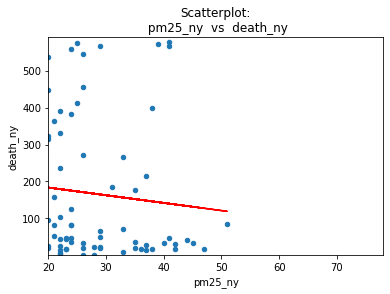

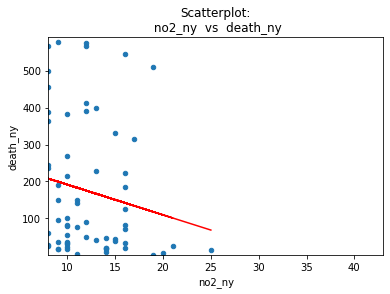

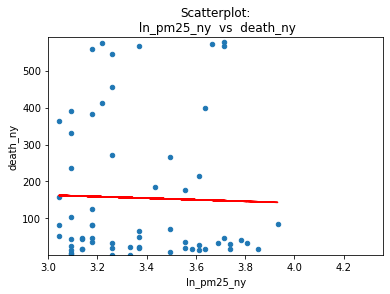

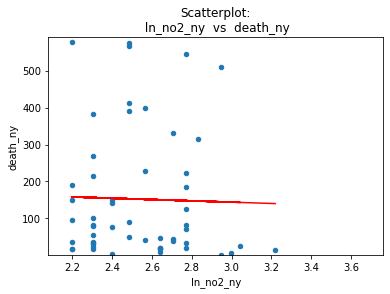

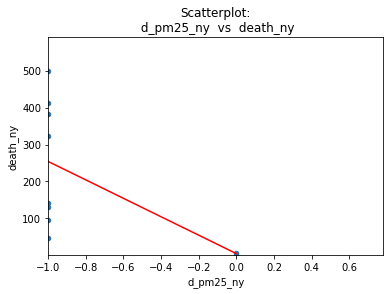

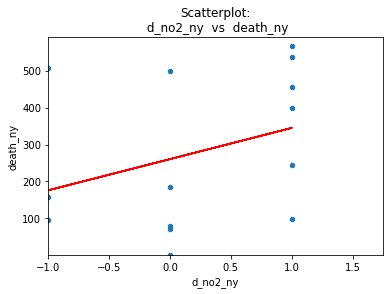

In [37]:
# 4.1.3.1) Deaths vs PM2.5
scatterplot(df_final, 'pm25_ny', 'death_ny', xlim_min = 20, xlim_max = 78)
# scatterplot(df_final, 'pm25_ny', 'death_ny')
# scatterplot(df_final, 'pm25_ny_ip', 'death_ny_ip', xlim_min = 20, xlim_max = 78)
# scatterplot(df_final, 'pm25_ny_ip', 'death_ny_ip')

# 4.1.3.2) Deaths vs NO2
scatterplot(df_final, 'no2_ny', 'death_ny', xlim_min = 8, xlim_max = 43)
# scatterplot(df_final, 'no2_ny', 'death_ny')
# scatterplot(df_final, 'no2_ny_ip', 'death_ny_ip', xlim_min = 8, xlim_max = 43)
# scatterplot(df_final, 'no2_ny_ip', 'death_ny_ip')

# 4.1.3.3) Deaths vs lnPM2.5
scatterplot(df_final, 'ln_pm25_ny', 'death_ny', xlim_min = 3, xlim_max = 4.36)
# scatterplot(df_final, 'ln_pm25_ny', 'death_ny')
# scatterplot(df_final, 'ln_pm25_ny_ip', 'death_ny_ip', xlim_min = 3, xlim_max = 4.36)
# scatterplot(df_final, 'ln_pm25_ny_ip', 'death_ny_ip')

# 4.1.3.4) Deaths vs lnNO2
scatterplot(df_final, 'ln_no2_ny', 'death_ny', xlim_min = 2.08, xlim_max = 3.76)
# scatterplot(df_final, 'ln_no2_ny', 'death_ny')
# scatterplot(df_final, 'ln_no2_ny_ip', 'death_ny_ip', xlim_min = 2.08, xlim_max = 3.76)
# scatterplot(df_final, 'ln_no2_ny_ip', 'death_ny_ip')

# 4.1.3.5) Deaths vs dPM2.5
scatterplot(df_final, 'd_pm25_ny', 'death_ny', xlim_min = -1, xlim_max = 0.78)
# scatterplot(df_final, 'd_pm25_ny', 'death_ny')
# scatterplot(df_final, 'd_pm25_ny_ip', 'death_ny_ip', xlim_min = -1, xlim_max = 0.78)
# scatterplot(df_final, 'd_pm25_ny_ip', 'death_ny_ip')

# 4.1.3.6) Deaths vs dNO2
scatterplot(df_final, 'd_no2_ny', 'death_ny', xlim_min = -1, xlim_max = 1.75)
# scatterplot(df_final, 'd_no2_ny', 'death_ny')
# scatterplot(df_final, 'd_no2_ny_ip', 'death_ny_ip', xlim_min = -1, xlim_max = 1.75)
# scatterplot(df_final, 'd_no2_ny_ip', 'death_ny_ip')

### 4.1.4) Scatterplot: Milan

<AxesSubplot:title={'center':'Scatterplot:\n d_no2_ml  vs  death_ml'}, xlabel='d_no2_ml', ylabel='death_ml'>

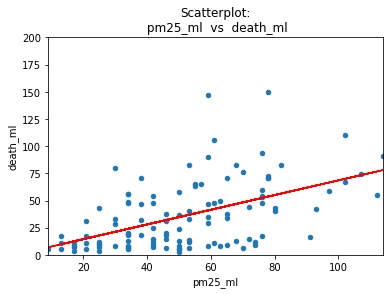

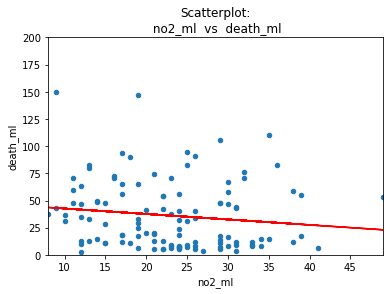

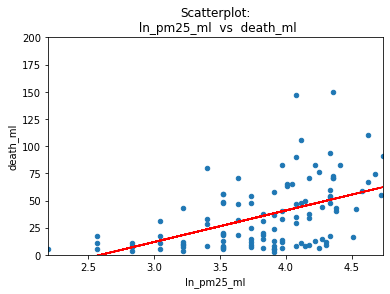

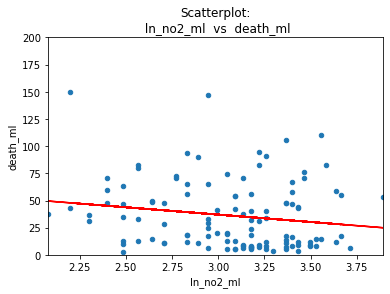

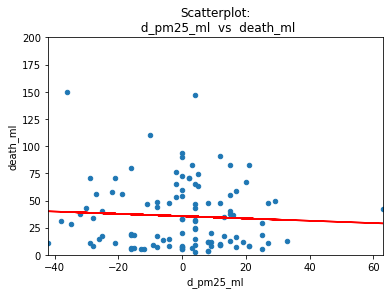

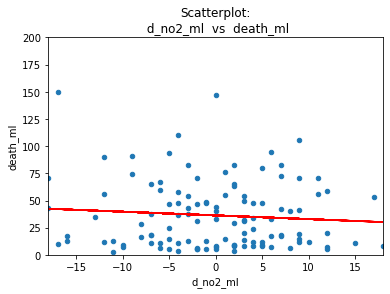

In [38]:
# 4.1.4.1) Deaths vs PM2.5
# scatterplot(df_final, 'pm25_ml', 'death_ml', xlim_min = 20, xlim_max = 78)
scatterplot(df_final, 'pm25_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'pm25_ml_ip', 'death_ml_ip', xlim_min = 20, xlim_max = 78)
# scatterplot(df_final, 'pm25_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)

# 4.1.4.2) Deaths vs NO2
# scatterplot(df_final, 'no2_ml', 'death_ml', xlim_min = 8, xlim_max = 43)
scatterplot(df_final, 'no2_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'no2_ml_ip', 'death_ml_ip', xlim_min = 8, xlim_max = 43)
# scatterplot(df_final, 'no2_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)

# 4.1.4.3) Deaths vs lnPM2.5
# scatterplot(df_final, 'ln_pm25_ml', 'death_ml', xlim_min = 3, xlim_max = 4.36)
scatterplot(df_final, 'ln_pm25_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'ln_pm25_ml_ip', 'death_ml_ip', xlim_min = 3, xlim_max = 4.36)
# scatterplot(df_final, 'ln_pm25_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)

# 4.1.4.4) Deaths vs lnNO2
# scatterplot(df_final, 'ln_no2_ml', 'death_ml', xlim_min = 2.08, xlim_max = 3.76)
scatterplot(df_final, 'ln_no2_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'ln_no2_ml_ip', 'death_ml_ip', xlim_min = 2.08, xlim_max = 3.76)
# scatterplot(df_final, 'ln_no2_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)

# 4.1.4.5) Deaths vs dPM2.5
# scatterplot(df_final, 'd_pm25_ml', 'death_ml', xlim_min = -1, xlim_max = 0.78)
scatterplot(df_final, 'd_pm25_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'd_pm25_ml_ip', 'death_ml_ip', xlim_min = -1, xlim_max = 0.78)
# scatterplot(df_final, 'd_pm25_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)

# 4.1.4.6) Deaths vs dNO2
# scatterplot(df_final, 'd_no2_ml', 'death_ml', xlim_min = -1, xlim_max = 1.75)
scatterplot(df_final, 'd_no2_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'd_no2_ml_ip', 'death_ml_ip', xlim_min = -1, xlim_max = 1.75)
# scatterplot(df_final, 'd_no2_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)


### 4.1.5) Scatterplot: Tokyo

<AxesSubplot:title={'center':'Scatterplot:\n d_no2_tk  vs  death_tk'}, xlabel='d_no2_tk', ylabel='death_tk'>

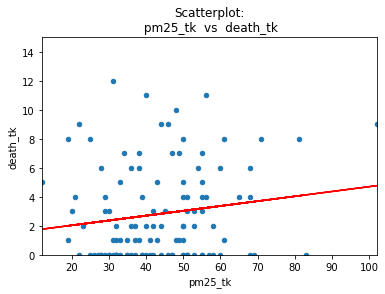

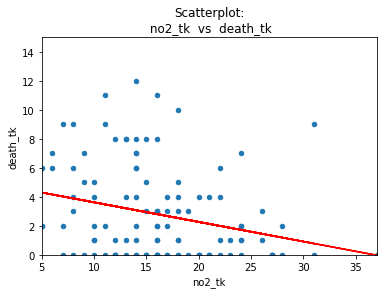

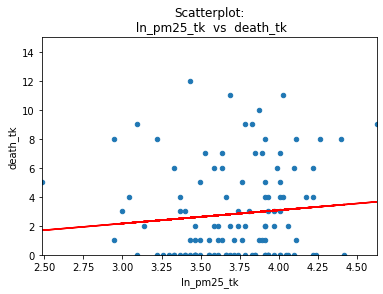

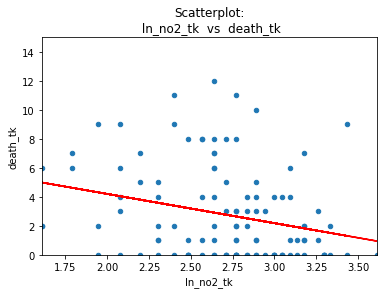

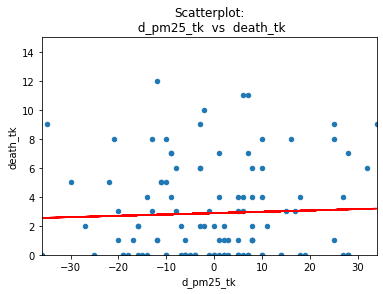

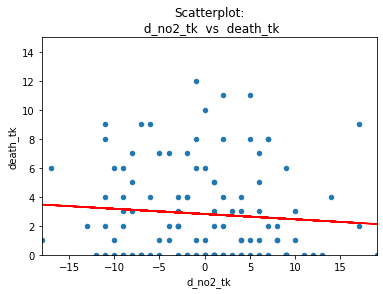

In [39]:
# 4.1.5.1) Deaths vs PM2.5
# scatterplot(df_final, 'pm25_tk', 'death_tk', xlim_min = 20, xlim_max = 78)
scatterplot(df_final, 'pm25_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'pm25_tk_ip', 'death_tk_ip', xlim_min = 20, xlim_max = 78)
# scatterplot(df_final, 'pm25_tk_ip', 'death_tk_ip')

# 4.1.5.2) Deaths vs NO2
# scatterplot(df_final, 'no2_tk', 'death_tk', xlim_min = 8, xlim_max = 43)
scatterplot(df_final, 'no2_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'no2_tk_ip', 'death_tk_ip', xlim_min = 8, xlim_max = 43)
# scatterplot(df_final, 'no2_tk_ip', 'death_tk_ip')

# 4.1.5.3) Deaths vs lnPM2.5
# scatterplot(df_final, 'ln_pm25_tk', 'death_tk', xlim_min = 3, xlim_max = 4.36)
scatterplot(df_final, 'ln_pm25_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'ln_pm25_tk_ip', 'death_tk_ip', xlim_min = 3, xlim_max = 4.36)
# scatterplot(df_final, 'ln_pm25_tk_ip', 'death_tk_ip')

# 4.1.5.4) Deaths vs lnNO2
# scatterplot(df_final, 'ln_no2_tk', 'death_tk', xlim_min = 2.08, xlim_max = 3.76)
scatterplot(df_final, 'ln_no2_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'ln_no2_tk_ip', 'death_tk_ip', xlim_min = 2.08, xlim_max = 3.76)
# scatterplot(df_final, 'ln_no2_tk_ip', 'death_tk_ip')

# 4.1.5.5) Deaths vs dPM2.5
# scatterplot(df_final, 'd_pm25_tk', 'death_tk', xlim_min = -1, xlim_max = 0.78)
scatterplot(df_final, 'd_pm25_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'd_pm25_tk_ip', 'death_tk_ip', xlim_min = -1, xlim_max = 0.78)
# scatterplot(df_final, 'd_pm25_tk_ip', 'death_tk_ip')

# 4.1.5.6) Deaths vs dNO2
# scatterplot(df_final, 'd_no2_tk', 'death_tk', xlim_min = -1, xlim_max = 1.75)
scatterplot(df_final, 'd_no2_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'd_no2_tk_ip', 'death_tk_ip', xlim_min = -1, xlim_max = 1.75)
# scatterplot(df_final, 'd_no2_tk_ip', 'death_tk_ip')


## 4.2) Plotting by date

We also create some additonal plots which are showing the date on the x-axis. 
<br>
*Note: We are plotting with plotly.express. In order to export the plots as images, we are using the write_image() function, which requires an installation of the kaleido package. See section 1.3) for more details.*

### 4.2.1) Create functions to obtain ceiling values

For our code to work, we start with two functions which allow us to round the y_column to either the nearest multiple of 10 or 100.

In [40]:
def round_up_to_nearest_10(value):
    return math.ceil(value / 10) * 10

def round_up_to_nearest_100(value):
    return math.ceil(value / 100) * 100

### 4.2.2) Create dictionary for lockdown start and end dates

In order to show the lockdown start and end dates within our plots, we create a dictionary that can be referenced when applying the functions.

In [41]:
lock_dict = {'ny': {'start': '2020-03-20', 'end': '2020-06-08'}, 
             'ml': {'start': '2020-03-09', 'end': '2020-05-18'},
             'tk': {'start': '2020-04-07', 'end': '2020-05-25'}}

### 4.2.3) Create a function to plot deaths by date

In the *plot_death_by_date()* function, we follow these steps:
<br> 
1) Create temporary dataframe that removes NAs.
<br> 
2) Find the maximum value of the y_column.
<br>
3) Obtain the *ceiling* value and its half value, using the functions we created before.
<br>
4) Create the line plot and make updates on its layout.
<br>
5) Add additional horizontal lines according to our *ceiling* and *half_ceiling* values. Important: To do so, the values have to be turned into vectors.
<br>
6) Add additional vertical lines according to the lockdown start and end dates from our dictionary.
<br>
7) Save the plot into our figures dictionary.

In [74]:
def plot_death_by_date(df, x_column, y_column, lock_start = 'N/A', lock_end = 'N/A'): 
    
    # Create temporary dataframe that removes NAs
    df_temp = df.loc[:, [x_column, y_column]].dropna()
    
    # Find maximum of the y_column
    ymax = df_temp[y_column].values.max()
    
    # Obtain ceiling values using our functions from 4.2.1). If the maximum the of y_column is low, we want multiples of 10, 
    # otherwise multiples of 100.
    if ymax < 50:
        ceiling = round_up_to_nearest_10(ymax)
    else:
        ceiling = round_up_to_nearest_100(ymax)
    
    # Create an additional value which is half of ceiling value - for the array multiplication below an integer value is needed 
    half_ceiling = int(ceiling * 0.5) 
    
    plot = px.line(df_temp, x = df_temp[x_column], y = df_temp[y_column])

    plot.update_layout(title = f"Timeline of {y_column}", xaxis_title = x_column, yaxis_title = y_column,
                       legend = dict(yanchor = "top", y = 0.99, xanchor = "right", x = 0.99))

    plot.update_traces(line_color = 'darkcyan', line_width = 3)
     
    plot.add_trace(go.Scatter(x = df_temp[x_column], y = [ceiling] * len(df_temp), mode = 'lines', 
                              name = str(ceiling) + ' count line', line = dict(dash = 'dash', color = 'black')))

    plot.add_trace(go.Scatter(x = df_temp[x_column], y = [half_ceiling] * len(df_temp), mode = 'lines',
                              name = str(half_ceiling) + ' count line', line = dict(dash = 'dash', color = 'maroon')))
    
    plot.add_trace(go.Scatter(x = [lock_start, lock_start], y = [0, ceiling], mode = 'lines', 
                             line = dict(color = 'orange', width = 2), name = 'lockdown start: ' + lock_start))
    
    plot.add_trace(go.Scatter(x = [lock_end, lock_end], y = [0, ceiling], mode = 'lines', 
                             line = dict(color = 'orange', width = 2), name = 'lockdown end: ' + lock_end))
    
    plot.show('png') # to show plotly in Jupyter
    
    # Save the plot into the \figures directory
    plot.write_image(f"..\\figures\_423_ {y_column} by {x_column}.jpg", format = 'jpg', scale = 1.8)

    return(plot)

### 4.2.4) Create a function to plot pollutant concentration by date

In the *plot_poll_by_date()* function, we follow these steps:
<br> 
1) Create temporary dataframe that removes NAs.
<br> 
2) Find the maximum value of the two pollutants.
<br>
3) Create the line plot and make updates on its layout.
<br>
4) Add additional vertical lines according to the lockdown start and end dates from our dictionary.
<br>
5) Save the plot into our figures dictionary.

In [75]:
def plot_poll_by_date(df, x_column, poll1, poll2, lock_start = 'N/A', lock_end = 'N/A'):
    
    # Create temporary dataframe that removes NAs
    df_temp = df.loc[:, [x_column, poll1, poll2]].dropna()
    
    # Find maximum of the y_column
    ymax = df_temp[[poll1, poll2]].values.max()
    
    plot = px.line(df_temp, x = x_column, y = poll1)

    plot.add_trace(go.Scatter(x = df_temp[x_column], y = df_temp[poll1], mode = 'lines', name = poll1, 
                              line_color = 'darkgreen', line_width = 2))

    plot.add_trace(go.Scatter(x = df_temp[x_column], y = df_temp[poll2], mode = 'lines', name = poll2,
                              line_color = 'mediumblue', line_width = 2))

    plot.update_layout(title = f"Timeline of {poll1} and {poll2} concentration levels", xaxis_title = x_column, 
                       yaxis_title = '$\\mu g / m^{3}$', legend = dict(yanchor = "top", y = 0.99, xanchor = "right", x = 0.99))
    
    plot.add_trace(go.Scatter(x = [lock_start, lock_start], y = [0, ymax], mode = 'lines', 
                             line = dict(color = 'orange', width = 2), name = 'lockdown start: ' + lock_start))
    
    plot.add_trace(go.Scatter(x = [lock_end, lock_end], y = [0, ymax], mode = 'lines', 
                             line = dict(color = 'orange', width = 2), name = 'lockdown end: ' + lock_end))
    
    plot.show('png') # to show plotly in Jupyter
    
    # Save the plot into the \figures directory
    plot.write_image(f"..\\figures\_424_concentration of {poll1} and {poll2} by {x_column}.jpg", format = 'jpg', scale = 1.8)
    
    return(plot)

### 4.2.5) Create a function that shows deaths by date, and pollutant concentration in a color code

In the *plot_death_vs_poll_by_date()* function, we follow these steps:
<br> 
1) Create temporary dataframe that removes NAs.
<br> 
2) Find the maximum value of the y_column.
<br>
3) Obtain the *ceiling* value, using the function we created before.
<br>
4) Create the line plot and make updates on its layout. Important: Disable the legend here as we replace it by a color scale on the *color_column*.
<br>
5) Add additional vertical lines according to the lockdown start and end dates from our dictionary.
<br>
6) Add labels to our plot which are describing the vertical lines.
<br>
7) Save the plot into our figures dictionary.

In [76]:
def plot_death_vs_poll_by_date(df, x_column, y_column, color_column, lock_start = 'N/A', lock_end = 'N/A'):

    # Create temporary dataframe that removes NAs
    df_temp = df.loc[:, [x_column, y_column, color_column]].dropna()
    
    # Find maximum of the y_column
    ymax = df_temp[y_column].values.max()
    
    # Obtain ceiling values using our functions from 4.2.1). If the maximum the of y_column is low, we want multiples of 10, 
    # otherwise multiples of 100.
    if ymax < 50:
        ceiling = round_up_to_nearest_10(ymax)
    else:
        ceiling = round_up_to_nearest_100(ymax)
    
    plot = px.bar(df_temp, x = x_column, y = y_column, color = color_column, 
                  title = f"Timeline of: {y_column} vs {color_column}", color_discrete_sequence = px.colors.qualitative.Vivid)
    # px.colors.qualitative.Vivid is a ist of rgb codes that is used for the color parameter

    plot.update_layout(uniformtext_minsize = 8, uniformtext_mode = 'hide', xaxis_title = x_column, yaxis_title = y_column, 
                       showlegend = False)
    
    plot.add_trace(go.Scatter(x = [lock_start, lock_start], y = [0, ceiling], mode = 'lines', 
                             line = dict(color = 'orange', width = 2)))
    
    plot.add_trace(go.Scatter(x = [lock_end, lock_end], y = [0, ceiling], mode = 'lines', 
                             line = dict(color = 'orange', width = 2)))
    
    plot.add_annotation(x = lock_start, y = ceiling, text = 'lockdown start: ' + lock_start, showarrow = False, yshift = 10)
    
    plot.add_annotation(x = lock_end, y = ceiling, text = 'lockdown end: ' + lock_end, showarrow = False, yshift = 10)
    
    plot.show('png') # to show plotly in Jupyter
    
    # Save the plot into the \figures directory
    plot.write_image(f"..\\figures\_425_ {y_column} colored by {color_column} by {x_column}.jpg", format = 'jpg', scale = 1.8)
    
    return(plot)

### 4.2.6) Plot by date for: New York

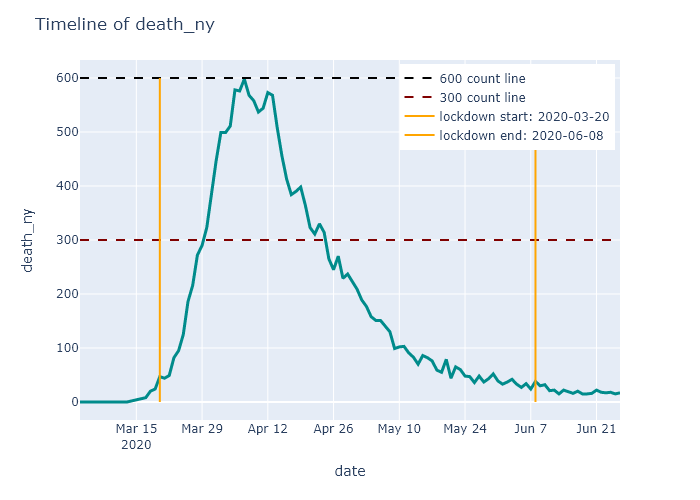

In [77]:
# 4.2.6.1) Timeline of confirmed deaths
plot_death_by_date(df_final, 'date', 'death_ny', lock_dict.get('ny').get('start'), lock_dict.get('ny').get('end'))
# plot_death_by_date(df_final, 'date', 'death_ny_ip', lock_dict.get('ny').get('start'), lock_dict.get('ny').get('end'))

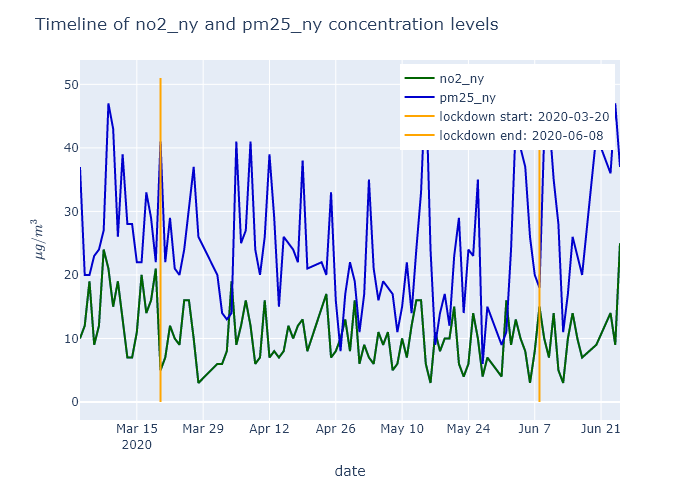

In [78]:
# 4.2.6.2) Timeline of pollutant concentration levels
plot_poll_by_date(df_final, 'date', 'no2_ny', 'pm25_ny', lock_dict.get('ny').get('start'), lock_dict.get('ny').get('end'))
# plot_poll_by_date(df_final, 'date', 'no2_ny_ip', 'pm25_ny_ip', lock_dict.get('ny').get('start'), lock_dict.get('ny').get('end'))

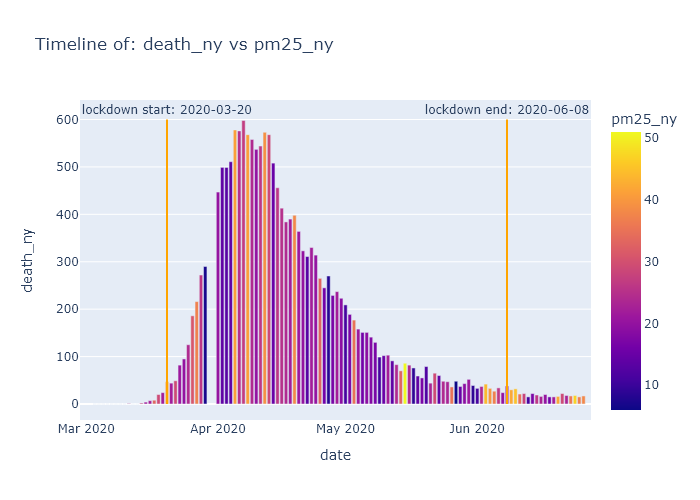

In [79]:
# 4.2.6.3) Timeline of death vs pollutant
plot_death_vs_poll_by_date(df_final, 'date', 'death_ny', 'pm25_ny', lock_dict.get('ny').get('start'), lock_dict.get('ny').get('end'))
# plot_death_vs_poll_by_date(df_final, 'date', 'death_ny_ip', 'pm25_ny_ip', lock_dict.get('ny').get('start'), lock_dict.get('ny').get('end'))

### 4.2.7) Plot by date for: Milan

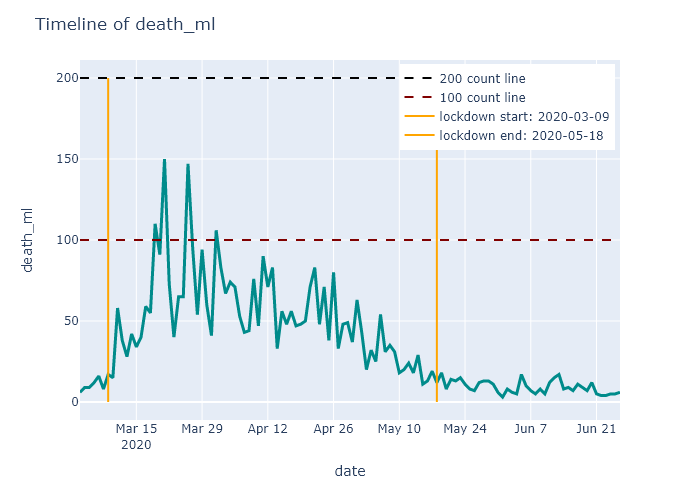

In [80]:
# 4.2.7.1) Timeline of confirmed deaths
plot_death_by_date(df_final, 'date', 'death_ml', lock_dict.get('ml').get('start'), lock_dict.get('ml').get('end'))
# plot_death_by_date(df_final, 'date', 'death_ml_ip', lock_dict.get('ml').get('start'), lock_dict.get('ml').get('end'))

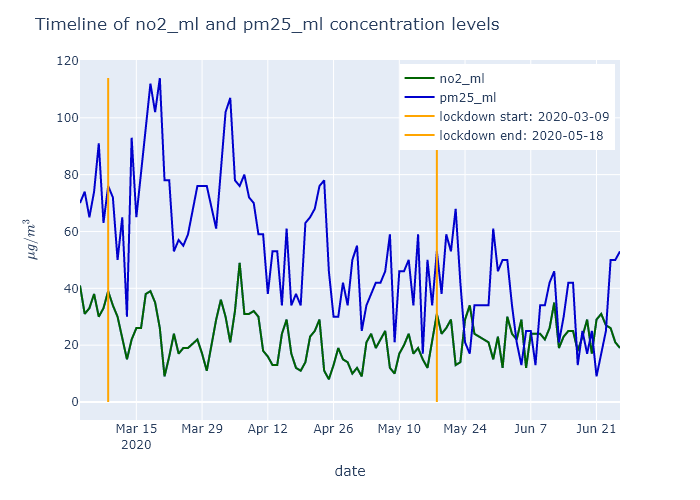

In [81]:
# 4.2.7.2) Timeline of pollutant concentration levels
plot_poll_by_date(df_final, 'date', 'no2_ml', 'pm25_ml', lock_dict.get('ml').get('start'), lock_dict.get('ml').get('end'))
# plot_poll_by_date(df_final, 'date', 'no2_ml_ip', 'pm25_ml_ip', lock_dict.get('ml').get('start'), lock_dict.get('ml').get('end'))

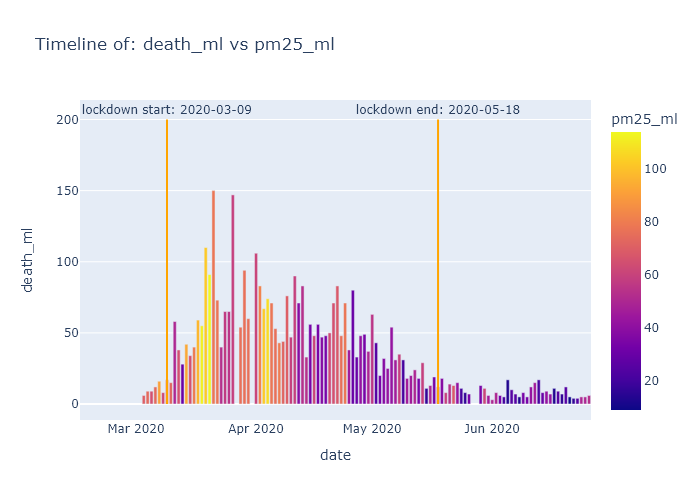

In [82]:
# 4.2.7.3) Timeline of death vs pollutant
plot_death_vs_poll_by_date(df_final, 'date', 'death_ml', 'pm25_ml', lock_dict.get('ml').get('start'), lock_dict.get('ml').get('end'))
# plot_death_vs_poll_by_date(df_final, 'date', 'death_ml_ip', 'pm25_ml_ip', lock_dict.get('ml').get('start'), lock_dict.get('ml').get('end'))

### 4.2.8) Plot by date for: Tokyo

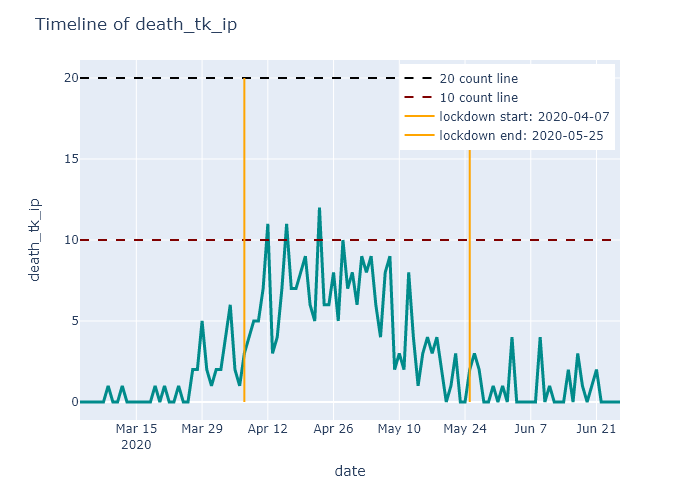

In [83]:
# 4.2.8.1) Timeline of confirmed deaths
# plot_death_by_date(df_final, 'date', 'death_tk', lock_dict.get('tk').get('start'), lock_dict.get('tk').get('end'))
plot_death_by_date(df_final, 'date', 'death_tk_ip', lock_dict.get('tk').get('start'), lock_dict.get('tk').get('end'))

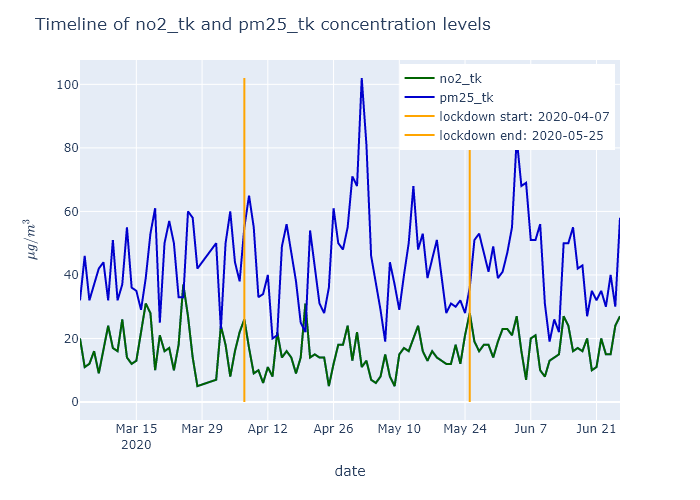

In [84]:
# 4.2.8.2) Timeline of pollutant concentration levels
plot_poll_by_date(df_final, 'date', 'no2_tk', 'pm25_tk', lock_dict.get('tk').get('start'), lock_dict.get('tk').get('end'))
# plot_poll_by_date(df_final, 'date', 'no2_tk_ip', 'pm25_tk_ip', lock_dict.get('tk').get('start'), lock_dict.get('tk').get('end'))

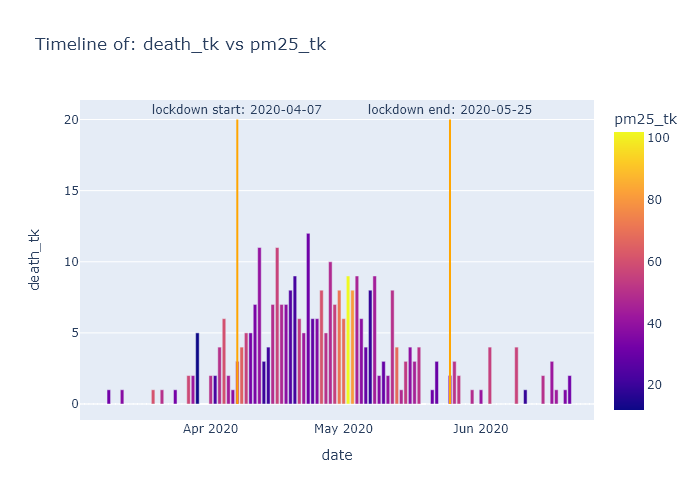

In [85]:
# 4.2.8.3) Timeline of death vs pollutant
plot_death_vs_poll_by_date(df_final, 'date', 'death_tk', 'pm25_tk', lock_dict.get('tk').get('start'), lock_dict.get('tk').get('end'))
# plot_death_vs_poll_by_date(df_final, 'date', 'death_tk_ip', 'pm25_tk_ip', lock_dict.get('tk').get('start'), lock_dict.get('tk').get('end'))

# 5) Prediction with Artificial Neural Networks (ANNs)

We are going to use TensorFlow and Keras, the main library for building Neural Networks. The main libraries and modules have already been imported - see 1).

## 5.1 Data Preparation

We first define the model input columns for all three cities, based on our dataframe *df_final*. For each city we have one column vector based on the raw variables and another one based on the interpolated variables. We then add for each city:
<br>
- Two reduced sets (*red*) which exclude the log and difference variables for the death count. Both a raw and an interpolated set is added. 
<br> *Note: After running different models in 5.3) we saw that the reduced sets had, in general, less predictive power. However, even though the results will not be shown, we kept these input vectors in our code.*
<br>
- Two extended sets (*ext*) which include all available air pollutants. Both a raw and an interpolated set is added. 

In [54]:
# 5.1.1) For New York
# Variables according to Magazzino et al. (2021)
input_ny = ['pm25_ny', 'no2_ny',\
            'ln_pm25_ny', 'ln_no2_ny',\
            'd_pm25_ny', 'd_no2_ny',\
            'ln_death_ny', 'd_death_ny', 'death_ny']
input_ny_ip = ['pm25_ny_ip', 'no2_ny_ip',\
               'ln_pm25_ny_ip', 'ln_no2_ny_ip',\
               'd_pm25_ny_ip', 'd_no2_ny_ip',\
               'ln_death_ny_ip', 'd_death_ny_ip', 'death_ny_ip']

# Reduced set: Excluding log and difference of the death count
input_ny_red =['pm25_ny', 'no2_ny',\
               'ln_pm25_ny', 'ln_no2_ny',\
               'd_pm25_ny','d_no2_ny',\
               'death_ny']
input_ny_red_ip = ['pm25_ny_ip', 'no2_ny_ip',\
                   'ln_pm25_ny_ip', 'ln_no2_ny_ip',\
                   'd_pm25_ny_ip', 'd_no2_ny_ip',\
                   'death_ny_ip']

# Extended set: Adding all available air pollutants
input_ny_ext = ['pm25_ny', 'no2_ny', 'o3_ny',\
                'ln_pm25_ny', 'ln_no2_ny', 'ln_o3_ny',\
                'd_pm25_ny', 'd_no2_ny', 'd_o3_ny',\
                'ln_death_ny', 'd_death_ny', 'death_ny']

# Note: For New York, we are not including an extended set with interpolated variables, as the interpolation is missing for
# the o3_ny pollutant - see 3.3.4)

# 5.1.2) For Milan
# Variables according to Magazzino et al. (2021)
input_ml = ['pm25_ml', 'no2_ml',\
            'ln_pm25_ml', 'ln_no2_ml',\
            'd_pm25_ml', 'd_no2_ml',\
            'ln_death_ml', 'd_death_ml', 'death_ml']
input_ml_ip = ['pm25_ml_ip', 'no2_ml_ip',\
               'ln_pm25_ml_ip', 'ln_no2_ml_ip',\
               'd_pm25_ml_ip', 'd_no2_ml_ip',\
               'ln_death_ml_ip', 'd_death_ml_ip', 'death_ml_ip']

# Reduced set: Excluding log and difference of the death count
input_ml_red = ['pm25_ml', 'no2_ml',\
                'ln_pm25_ml', 'ln_no2_ml',\
                'd_pm25_ml', 'd_no2_ml',\
                'death_ml']
input_ml_red_ip = ['pm25_ml_ip', 'no2_ml_ip',\
                   'ln_pm25_ml_ip', 'ln_no2_ml_ip',\
                   'd_pm25_ml_ip', 'd_no2_ml_ip',\
                   'death_ml_ip']

# Extended set: Adding all available air pollutants
input_ml_ext = ['pm25_ml', 'no2_ml', 'pm10_ml',\
                'ln_pm25_ml', 'ln_no2_ml', 'ln_pm10_ml',\
                'd_pm25_ml','d_no2_ml', 'd_pm10_ml',\
                'ln_death_ml', 'd_death_ml', 'death_ml']
input_ml_ext_ip = ['pm25_ml_ip', 'no2_ml_ip', 'pm10_ml_ip',\
                   'ln_pm25_ml_ip', 'ln_no2_ml_ip', 'ln_pm10_ml_ip',\
                   'd_pm25_ml_ip','d_no2_ml_ip', 'd_pm10_ml_ip',\
                   'ln_death_ml_ip', 'd_death_ml_ip', 'death_ml_ip']

# 5.1.3) For Tokyo
# Variables according to Magazzino et al. (2021)
input_tk = ['pm25_tk', 'no2_tk',\
            'ln_pm25_tk', 'ln_no2_tk',\
            'd_pm25_tk','d_no2_tk',\
            'ln_death_tk', 'd_death_tk', 'death_tk']
input_tk_ip = ['pm25_tk_ip', 'no2_tk_ip',\
               'ln_pm25_tk_ip', 'ln_no2_tk_ip',\
               'd_pm25_tk_ip', 'd_no2_tk_ip',\
               'ln_death_tk_ip', 'd_death_tk_ip', 'death_tk_ip']

# Reduced set: Excluding log and difference of the death count
input_tk_red = ['pm25_tk', 'no2_tk',\
                'ln_pm25_tk', 'ln_no2_tk',\
                'd_pm25_tk','d_no2_tk',\
                'death_tk']
input_tk_red_ip = ['pm25_tk_ip', 'no2_tk_ip',\
                'ln_pm25_tk_ip', 'ln_no2_tk_ip',\
                'd_pm25_tk_ip','d_no2_tk_ip',\
                'death_tk_ip']

# Extended set: Adding all available air pollutants
input_tk_ext = ['pm25_tk', 'no2_tk', 'pm10_tk', 'o3_tk', 'so2_tk', 'co_tk',\
                'ln_pm25_tk', 'ln_no2_tk', 'ln_pm10_tk', 'ln_o3_tk', 'ln_so2_tk', 'ln_co_tk',\
                'd_pm25_tk','d_no2_tk', 'd_pm10_tk', 'd_o3_tk', 'd_so2_tk', 'd_co_tk',\
                'ln_death_tk', 'd_death_tk', 'death_tk']
input_tk_ext_ip = ['pm25_tk_ip', 'no2_tk_ip', 'pm10_tk_ip', 'o3_tk_ip', 'so2_tk_ip', 'co_tk_ip',\
                'ln_pm25_tk_ip', 'ln_no2_tk_ip', 'ln_pm10_tk_ip', 'ln_o3_tk_ip', 'ln_so2_tk_ip', 'ln_co_tk_ip',\
                'd_pm25_tk_ip', 'd_no2_tk_ip', 'd_pm10_tk_ip', 'd_o3_tk_ip', 'd_so2_tk_ip', 'd_co_tk_ip',\
                'ln_death_tk_ip', 'd_death_tk_ip', 'death_tk_ip']

## 5.2) Create functions for training and testing

### 5.2.1) Create a function to obtain tensors for our X matrix and our y vector

We first create a function which provides the X and y tensors for our *keras.tensorflow* model. After removing NAs, the function separates our X variables from the y variable and uses *tf.convert_to_tensor()* to obtain the corresponding tensors.

In [55]:
def create_X_and_y_tensors(all_columns, y_vector: str):
    df_temp = df_final.loc[:, all_columns].dropna()
    all_columns_without_y_vector = [x for x in all_columns if x != y_vector]
    X = df_temp.loc[:, all_columns_without_y_vector]
    X = tf.convert_to_tensor(X.values, dtype = tf.float64)
    y = df_temp.loc[:, y_vector]
    y = tf.convert_to_tensor(y.values, dtype = tf.float64)
    return X, y

### 5.2.2) Create a function to split the dataset into the training and test sets

To split our data into training and test sets we are using the *train_test_split()* function from *scikit-learn*.

In [56]:
def split_train_test(X, y, test_size = 0.2, random_state = 0):
    X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size = test_size, random_state = random_state)
    return X_train, X_test, y_train, y_test

### 5.2.3) Create a function to apply feature scaling 

We use again *scikit-learn* to scale our X variables in both training and test sets. The *StandardScaler()* function applies a standardization of the data, which means that we subtract the mean and divide by the standard deviation.

In [57]:
def apply_feature_scaling(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

### 5.2.4) Create the *master_model_train_test()* function – summarizes all functions in 5.2)

The *master_model_train_test()* function allows us set the parameters of all functions in 5.2) in one command. Additionally, it defines the model architecture and the compiler (algorithm, loss function and an additional metric). Finally, we also update our model dictionary and plot the training and validation history.

These are the steps:
<br>
1) Create the tensors using: *create_X_and_y_tensors()*
<br>
2) Define model architecture: We intent do rebuild the model from Magazzino et al. (2021), using *ReLU* activation functions in the hidden layers, and a linear output layer (as we are dealing with a regression problem).
<br>
3) Split training and test set using: *split_train_test()*
<br>
4) Apply feature scaling (type: standardization) using: *apply_feature_scaling()*
<br>
5) Fix *Adam* as the optimizer. Select learning rate, loss function and an additional metric according to the parameter settings.
<br>
6) Fit the model according to parameters settings.
<br>
7) Test the parameter fit on our test data.
<br>
8) Access the *model_fit* (via the *history* attribute) to obtain the last values of *loss* and *metric_input* – for both training and validation data. Then obtain the calculated *loss* and *metric_input* from the testing, by accessing the *model_eval* list object.
<br>
9) Create a 1x2 grid of subplots. The left-hand plot shows *loss* and *metric_input* from the training history. The right-hand plot shows the same metrics from the validation history.
<br>
10) Save the plot into our figures directory.

In [58]:
def master_model_train_test(input_vector, input_vector_name: str, y_vector: str, test_size = 0.2, random_state = 0,\
                        learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                        batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1, callbacks = None, verbose = 0):
    
    print(f"Training the {input_vector_name} training set: \n")
    
    # Create tensors - output: X, y
    X, y = create_X_and_y_tensors(all_columns = input_vector, y_vector = y_vector)
    number_of_features = X.shape[1]
    
    # Create Magazzino-Mele-Sarkodie model
    # Input layer
    inputs = layers.Input(name = "input", shape = (number_of_features,))
    # Hidden layers
    h1 = layers.Dense(name = "h1", units = 13, activation = 'relu')(inputs)
    h2 = layers.Dense(name = "h2", units = 8, activation = 'relu')(h1)
    h3 = layers.Dense(name = "h3", units = 7, activation = 'relu')(h2)
    h4 = layers.Dense(name = "h4", units = 8, activation = 'relu')(h3)
    h5 = layers.Dense(name = "h5", units = 3, activation = 'relu')(h4)
    h6 = layers.Dense(name = "h6", units = 1, activation = 'relu')(h5)
    h7 = layers.Dense(name = "h7", units = 1, activation = 'relu')(h6)
    # Output layer
    outputs = tf.keras.activations.linear(h7)
    model = models.Model(inputs = inputs, outputs = outputs, name = "Magazzino-Mele-Sarkodie")
#     model.summary()

    # Split training and test set - output: X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = split_train_test(X, y, test_size = test_size, random_state = random_state)
    
    # Apply feature scaling - output: X_train, X_test
    X_train, X_test = apply_feature_scaling(X_train, X_test)
    
    # Print train and test shape
#     print("X_train shape: ", X_train.shape)
#     print("y_train shape: ", y_train.shape)
#     print("X_test shape: ", X_test.shape)
#     print("y_test shape: ", y_test.shape)
    
    # Compile model
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    model.compile(optimizer = optimizer, loss = loss, metrics = metrics_input)
    
    # Train model - output: History of loss and metric
    print("\n")
    model_fit = model.fit(x = X_train, y = y_train, batch_size = batch_size, epochs = epochs, shuffle = shuffle, 
                          validation_split = validation_size, callbacks = callbacks, verbose = verbose)
    
    # Test model - output: List of loss and metric
    print(f"\n Testing the {input_vector_name} test set: \n") 
    model_eval = model.evaluate(X_test, y_test)
    
    # Update model_dict
    train_loss = round(model_fit.history['loss'][-1], 4)
    train_metric = round(model_fit.history[metrics_input][-1], 4)
    val_loss = round(model_fit.history['val_loss'][-1], 4)
    val_metric = round(model_fit.history['val_' + metrics_input][-1], 4)
    test_loss = round(model_eval[0], 4)
    test_metric = round(model_eval[1], 4)
    model_dict.update({input_vector_name: {'train_loss': train_loss, 'val_loss': val_loss, 'test_loss': test_loss,\
                                           'train_metric': train_metric, 'val_metric': val_metric, 'test_metric': test_metric,\
                                           'X_train shape': X_train.shape, 'X_test shape': X_test.shape}})
       
    fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (15, 3))

    # Create training history plot
    ax[0].set(title = "Training history")   
    ax11 = ax[0].twinx()
    ax[0].plot(model_fit.history['loss'], color = 'black')   
    ax[0].set_xlabel('Epochs')    
    ax[0].set_ylabel('Loss', color = 'black')            
    ax11.plot(model_fit.history[metrics_input], label = metrics_input)   
    ax11.set_ylabel("Score", color = 'steelblue')    
    ax11.legend()

    # Create validation history plot
    ax[1].set(title = "Validation history")    
    ax22 = ax[1].twinx()    
    ax[1].plot(model_fit.history['val_loss'], color = 'black')   
    ax[1].set_xlabel('Epochs')    
    ax[1].set_ylabel('Loss', color = 'black')              
    ax22.plot(model_fit.history['val_' + metrics_input], label = metrics_input)   
    ax22.set_ylabel("Score", color = "steelblue")
    
     # Save the plot into the \figures directory
    plt.savefig(f"..\\figures\_524_{input_vector_name}_training_validation_history.jpg", dpi = 300, bbox_inches = 'tight')
    
    return model_fit, model_eval, model_dict

## 5.3) Run the model training and testing

### 5.3.1) Create an empty model dictionary

We create an empty dictionary, which will be updated when applying the *master_model_train_test()* function. 

In [59]:
model_dict = dict()

### 5.3.2) Apply the *master_model_train_test()* function and update the model dictionary

We can now apply our training, validation and testing to our data, by specifying the input vectors from 5.1). We chose the *Adam* optimizer as it provided, overall, the best results.

#### 5.3.2.1) Applied to: New York

Training the input_ny training set: 




 Testing the input_ny test set: 

1/1 [==============================] - 0s 17ms/step - loss: 200.2778 - mape: 100.0000


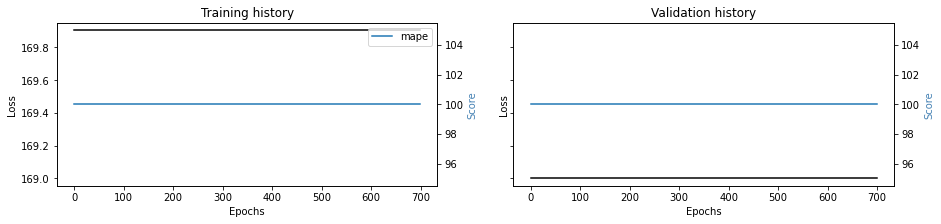

In [60]:
model_fit, model_eval, model_dict = master_model_train_test(input_vector = input_ny, input_vector_name = 'input_ny',\
                                            y_vector = 'death_ny', test_size = 0.2, random_state = 0,\
                                            learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                                            batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1,\
                                            callbacks = None, verbose = 0)

Training the input_ny_ip training set: 




 Testing the input_ny_ip test set: 

1/1 [==============================] - 0s 20ms/step - loss: 12.1508 - mape: 19.1620


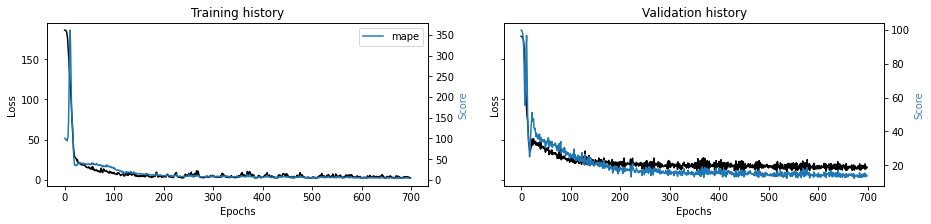

In [61]:
model_fit, model_eval, model_dict = master_model_train_test(input_vector = input_ny_ip, input_vector_name = 'input_ny_ip',\
                                            y_vector = 'death_ny_ip', test_size = 0.2, random_state = 0,\
                                            learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                                            batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1,\
                                            callbacks = None, verbose = 0)

Training the input_ny_ext training set: 




 Testing the input_ny_ext test set: 

1/1 [==============================] - 0s 20ms/step - loss: 101.4000 - mape: 100.0000


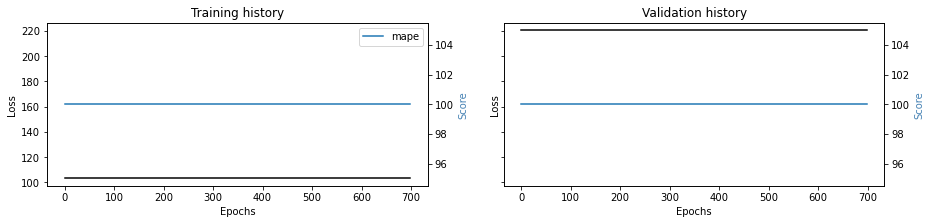

In [62]:
model_fit, model_eval, model_dict = master_model_train_test(input_vector = input_ny_ext, input_vector_name = 'input_ny_ext',\
                                            y_vector = 'death_ny', test_size = 0.2, random_state = 0,\
                                            learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                                            batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1,\
                                            callbacks = None, verbose = 0)

#### 5.3.2.2) Applied to: Milan

Training the input_ml training set: 




 Testing the input_ml test set: 

1/1 [==============================] - 0s 15ms/step - loss: 37.5000 - mape: 100.0000


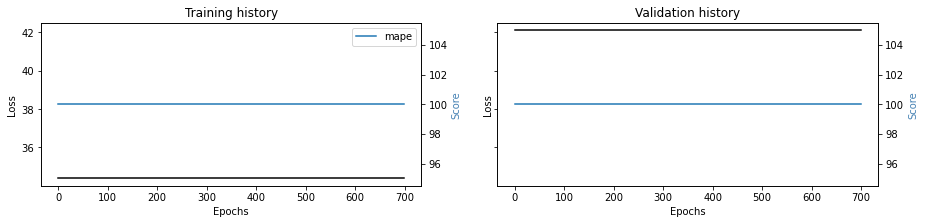

In [63]:
model_fit, model_eval, model_dict = master_model_train_test(input_vector = input_ml, input_vector_name = 'input_ml',\
                                            y_vector = 'death_ml', test_size = 0.2, random_state = 0,\
                                            learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                                            batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1,\
                                            callbacks = None, verbose = 0)

Training the input_ml_ip training set: 




 Testing the input_ml_ip test set: 

1/1 [==============================] - 0s 29ms/step - loss: 40.0870 - mape: 100.0000


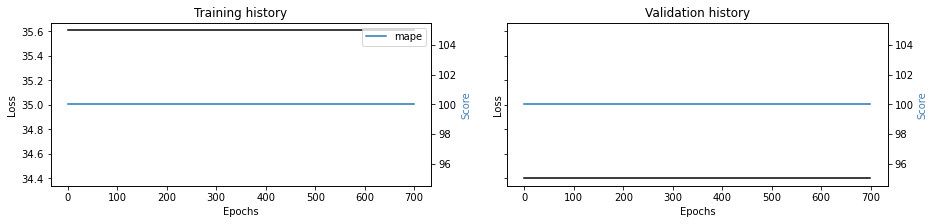

In [64]:
model_fit, model_eval, model_dict = master_model_train_test(input_vector = input_ml_ip, input_vector_name = 'input_ml_ip',\
                                            y_vector = 'death_ml_ip', test_size = 0.2, random_state = 0,\
                                            learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                                            batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1,\
                                            callbacks = None, verbose = 0)

Training the input_ml_ext training set: 




 Testing the input_ml_ext test set: 

1/1 [==============================] - 0s 20ms/step - loss: 45.3810 - mape: 100.0000


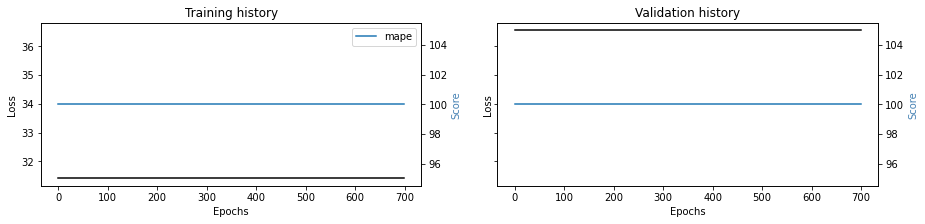

In [65]:
model_fit, model_eval, model_dict = master_model_train_test(input_vector = input_ml_ext, input_vector_name = 'input_ml_ext',\
                                            y_vector = 'death_ml', test_size = 0.2, random_state = 0,\
                                            learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                                            batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1,\
                                            callbacks = None, verbose = 0)

Training the input_ml_ext_ip training set: 




 Testing the input_ml_ext_ip test set: 

1/1 [==============================] - 0s 24ms/step - loss: 40.0870 - mape: 100.0000


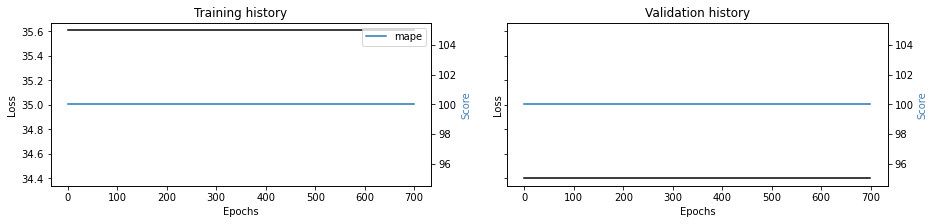

In [66]:
model_fit, model_eval, model_dict = master_model_train_test(input_vector = input_ml_ext_ip, input_vector_name = 'input_ml_ext_ip',\
                                            y_vector = 'death_ml_ip', test_size = 0.2, random_state = 0,\
                                            learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                                            batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1,\
                                            callbacks = None, verbose = 0)

#### 5.3.2.3) Applied to: Tokyo

Training the input_tk training set: 




 Testing the input_tk test set: 

1/1 [==============================] - 0s 15ms/step - loss: 0.2418 - mape: 8.8706


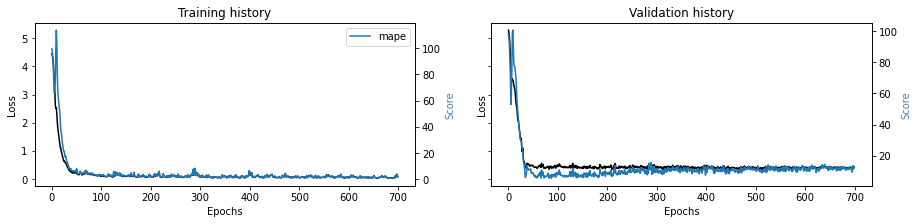

In [67]:
model_fit, model_eval, model_dict = master_model_train_test(input_vector = input_tk, input_vector_name = 'input_tk',\
                                            y_vector = 'death_tk', test_size = 0.2, random_state = 0,\
                                            learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                                            batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1,\
                                            callbacks = None, verbose = 0)

Training the input_tk_ip training set: 




 Testing the input_tk_ip test set: 

1/1 [==============================] - 0s 24ms/step - loss: 5.1333 - mape: 100.0000


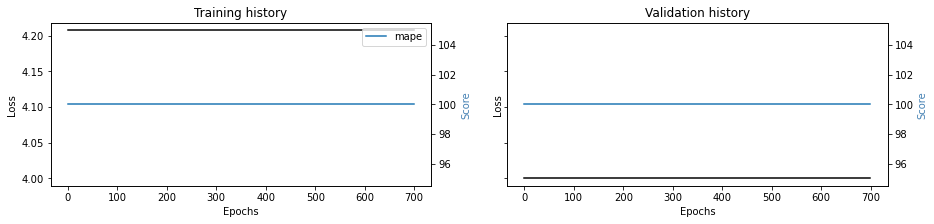

In [68]:
model_fit, model_eval, model_dict = master_model_train_test(input_vector = input_tk_ip, input_vector_name = 'input_tk_ip',\
                                            y_vector = 'death_tk_ip', test_size = 0.2, random_state = 0,\
                                            learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                                            batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1,\
                                            callbacks = None, verbose = 0)

Training the input_tk_ext training set: 




 Testing the input_tk_ext test set: 

1/1 [==============================] - 0s 20ms/step - loss: 4.2727 - mape: 100.0000


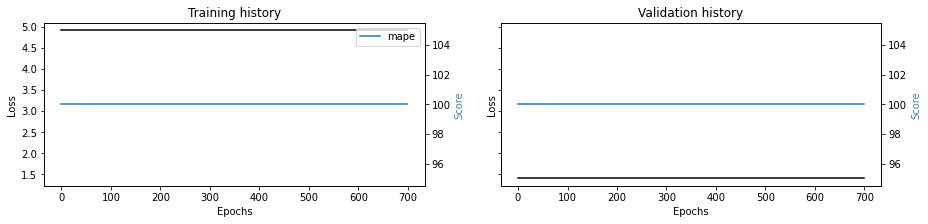

In [69]:
model_fit, model_eval, model_dict = master_model_train_test(input_vector = input_tk_ext, input_vector_name = 'input_tk_ext',\
                                            y_vector = 'death_tk', test_size = 0.2, random_state = 0,\
                                            learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                                            batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1,\
                                            callbacks = None, verbose = 0)

Training the input_tk_ext_ip training set: 




 Testing the input_tk_ext_ip test set: 

1/1 [==============================] - 0s 22ms/step - loss: 0.4921 - mape: 9.5412


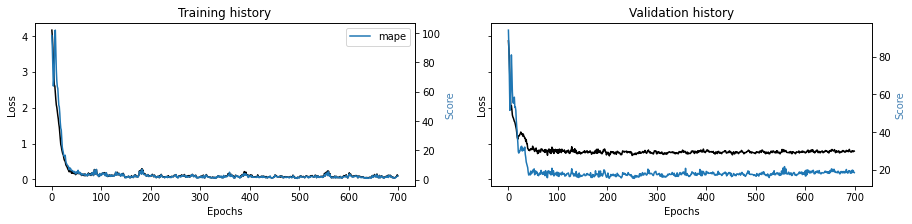

In [70]:
model_fit, model_eval, model_dict = master_model_train_test(input_vector = input_tk_ext_ip, input_vector_name = 'input_tk_ext_ip',\
                                            y_vector = 'death_tk_ip', test_size = 0.2, random_state = 0,\
                                            learning_rate = 0.01, loss = 'mean_absolute_error', metrics_input = 'mape',\
                                            batch_size = 20, epochs = 700, shuffle = True, validation_size = 0.1,\
                                            callbacks = None, verbose = 0)

### 5.3.3) Create a summary table from the model dictionary

As a last step in our project, we turn our model dictionary into a dataframe using *pd.DataFrame.from_dict()*. Here, *orient = 'index'* is added so that our dictionary keys (= *input_vector_name*) appear in the rows.

In [71]:
summary = pd.DataFrame.from_dict(model_dict, orient = 'index')
print(summary)

                 train_loss  val_loss  test_loss  train_metric  val_metric  \
input_ny           169.9048  169.0000   200.2778      100.0000    100.0000   
input_ny_ip          2.1728   15.0085    12.1508        3.9079     13.6689   
input_ny_ext       103.1176  220.5000   101.4000      100.0000    100.0000   
input_ml            34.3896   42.1111    37.5000      100.0000    100.0000   
input_ml_ip         35.6098   34.4000    40.0870      100.0000    100.0000   
input_ml_ext        31.4133   36.5556    45.3810      100.0000    100.0000   
input_ml_ext_ip     35.6098   34.4000    40.0870      100.0000    100.0000   
input_tk             0.0928    0.4266     0.2418        1.9701     12.3063   
input_tk_ip          4.2075    4.0000     5.1333      100.0000    100.0000   
input_tk_ext         4.9189    1.4000     4.2727      100.0000    100.0000   
input_tk_ext_ip      0.1025    0.7910     0.4921        2.5190     18.5826   

                 test_metric X_train shape X_test shape  
input